# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
import seaborn as sns
df= sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df1 = df
df2= df

In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Checking null values

In [5]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

# Shape of dataset

In [6]:
df.shape

(344, 7)

# Remove NaN values

In [7]:
df1 = df.dropna()

# Again check

In [8]:
df1.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Inputs and outputs variables

In [9]:
x = df1[['bill_depth_mm', 'body_mass_g', 'flipper_length_mm']]
y = df1['sex']

In [10]:
x.head()

,bill_depth_mm,body_mass_g,flipper_length_mm
0,18.7,3750.0,181.0
1,17.4,3800.0,186.0
2,18.0,3250.0,195.0
4,19.3,3450.0,193.0
5,20.6,3650.0,190.0


In [11]:
y.head()

0      Male
1    Female
2    Female
4    Female
5      Male
Name: sex, dtype: object

# Training and fitting the model

In [12]:
from sklearn.naive_bayes import GaussianNB 
model  = GaussianNB().fit(x, y)
model

GaussianNB()

# Train test split and testing the accuracy

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.15, random_state=0)
#X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

# Predictions

In [14]:
# traning the model on training set
import numpy as np
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X_train, y_train)
# making prediction on the testing set
y_pred = model.predict(X_test)
y_pred

array(['Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Male'], dtype='<U6')

# Accuracy score

In [15]:
# to check the accuracy compare it with original y values
from sklearn import metrics
score = metrics.accuracy_score(y_test, y_pred)
print("{Gaussian Naive Bays model accuracy (in %) is:", metrics.accuracy_score(y_test, y_pred)*100, '%')

{Gaussian Naive Bays model accuracy (in %) is: 90.0 %


# Confusion metrics

In [16]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[28,  1],
       [ 4, 17]], dtype=int64)

Text(0.5, 1.0, "('Gaussian Naive Bays model accuracy (in %) is: {0}', '90.000000%')")

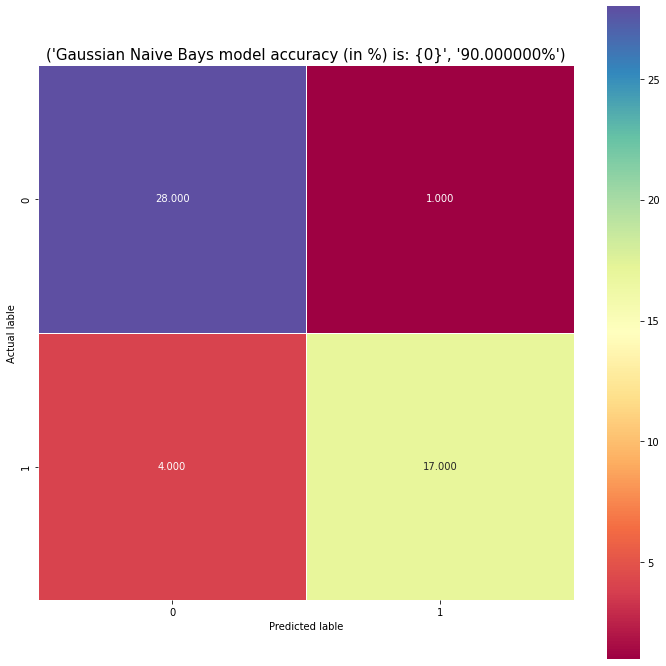

In [17]:
import seaborn as sns
plt. figure(figsize=(12, 12))
sns.heatmap(cm, annot= True, fmt=".3f", linewidths = .5, square = True, cmap = 'Spectral')
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')
all_sample_title ='Gaussian Naive Bays model accuracy (in %) is: {0}', format(score, '%')
plt.title(all_sample_title, size = 15)